In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt


In [15]:
data = pd.read_csv(r"C:\Users\laser\Downloads\OfficeWarehouse2.csv")

In [16]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned
0,1,CA-2020-152156,11/8/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,False
1,2,CA-2020-152156,11/8/20,11/11/20,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,False
2,3,CA-2020-138688,6/12/20,6/16/20,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,False
3,4,US-2019-108966,10/11/19,10/18/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,False
4,5,US-2019-108966,10/11/19,10/18/19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,False


In [17]:
profit = data["Profit"]
profit.shape

(9994,)

In [18]:
profit.head()

0     41.9136
1    219.5820
2      6.8714
3   -383.0310
4      2.5164
Name: Profit, dtype: float64

In [19]:
average_profit = np.average(profit)
average_profit

28.65689630778467

In [33]:
profit_losses = data.loc[data["Profit"]<0, ["Category", "Profit", "Product Name", "Discount"]]

In [34]:
profit_losses

,Category,Profit,Product Name,Discount
3,Furniture,-383.0310,Bretford CR4500 Series Slim Rectangular Table,0.45
14,Office Supplies,-123.8580,Holmes Replacement Filter for HEPA Air Cleaner...,0.80
15,Office Supplies,-3.8160,Storex DuraTech Recycled Plastic Frosted Binders,0.80
23,Furniture,-1.0196,"Global Deluxe Stacking Chair, Gray",0.30
27,Furniture,-1665.0522,"Riverside Palais Royal Lawyers Bookcase, Royal...",0.50
...,...,...,...,...
9920,Office Supplies,-35.8176,"GBC Pre-Punched Binding Paper, Plastic, White,...",0.80
9921,Office Supplies,-4.5936,Acco Expandable Hanging Binders,0.70
9931,Furniture,-40.1960,O'Sullivan Living Dimensions 3-Shelf Bookcases,0.15
9937,Furniture,-1.7772,Hon 61000 Series Interactive Training Tables,0.20


In [37]:
average_loss = np.average(profit_losses["Profit"])
average_loss

-83.44804152859435

In [39]:
stdv_loss = statistics.stdev(profit_losses["Profit"])
stdv_loss

284.4234222581846

In [40]:
avg_discount_loss = np.average(profit_losses["Discount"])
avg_discount_loss

0.48088722608230894

In [41]:
stdv_discount_loss = statistics.stdev(profit_losses["Discount"])
stdv_discount_loss

0.23508028803091294

In [30]:
biggestloss = min(profit_losses["Profit"])
biggestloss

-6599.978

In [35]:
biggestloss = data.loc[data["Profit"]==-6599.978, ["Category", "Profit", "Product Name", "Discount"]]
biggestloss 

,Category,Profit,Product Name,Discount
7772,Technology,-6599.978,Cubify CubeX 3D Printer Double Head Print,0.7


In [44]:
technology_losses = profit_losses.loc[profit_losses["Category"] == "Technology", [ "Profit", "Product Name", "Discount"]]
technology_losses

,Profit,Product Name,Discount
100,-10.7973,SanDisk Ultra 64 GB MicroSDHC Class 10 Memory ...,0.2
103,-26.8758,Logitech K350 2.4Ghz Wireless Keyboard,0.2
130,-11.9940,Anker 36W 4-Port USB Wall Charger Travel Power...,0.4
165,-1359.9920,Lexmark MX611dhe Monochrome Laser Printer,0.4
214,-14.6958,Speck Products Candyshell Flip Case,0.4
...,...,...,...
9713,-6.4450,Sony 16GB Class 10 Micro SDHC R40 Memory Card,0.2
9777,-26.9460,Microsoft Natural Keyboard Elite,0.2
9797,-43.1178,GE 30524EE4,0.4
9800,-21.4236,LG Electronics Tone+ HBS-730 Bluetooth Headset,0.4


In [49]:
avg_techloss = np.average(technology_losses["Profit"])
avg_techloss

-142.36132177121772

In [52]:
stdev_techloss = statistics.stdev(technology_losses["Profit"])
stdev_techloss

556.8108877662794

In [46]:
furniture_losses = profit_losses.loc[profit_losses["Category"] == "Furniture", [ "Profit", "Product Name", "Discount"]]
furniture_losses

,Profit,Product Name,Discount
3,-383.0310,Bretford CR4500 Series Slim Rectangular Table,0.45
23,-1.0196,"Global Deluxe Stacking Chair, Gray",0.30
27,-1665.0522,"Riverside Palais Royal Lawyers Bookcase, Royal...",0.50
36,-147.9630,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",0.60
38,-46.9764,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",0.32
...,...,...,...
9912,-54.3204,"Global Leather & Oak Executive Chair, Burgundy",0.20
9919,-143.4310,Novimex Swivel Fabric Task Chair,0.30
9931,-40.1960,O'Sullivan Living Dimensions 3-Shelf Bookcases,0.15
9937,-1.7772,Hon 61000 Series Interactive Training Tables,0.20


In [50]:
avg_furnitureloss = np.average(furniture_losses["Profit"])
avg_furnitureloss

-85.34469047619046

In [53]:
stdev_furnitureloss = statistics.stdev(furniture_losses["Profit"])
stdev_furnitureloss

152.15072098770747

In [56]:
biggestloss = min(furniture_losses["Profit"])
biggestloss

-1862.3124

In [61]:
biggestloss = furniture_losses.loc[furniture_losses["Profit"]==-1862.3124, ["Profit", "Product Name", "Discount"]]
biggestloss 

,Profit,Product Name,Discount
9639,-1862.3124,Chromcraft Bull-Nose Wood Oval Conference Tabl...,0.4


In [47]:
office_losses = profit_losses.loc[profit_losses["Category"] == "Office Supplies", [ "Profit", "Product Name", "Discount"]]
office_losses

,Profit,Product Name,Discount
14,-123.8580,Holmes Replacement Filter for HEPA Air Cleaner...,0.8
15,-3.8160,Storex DuraTech Recycled Plastic Frosted Binders,0.8
28,-7.0532,Avery Recycled Flexi-View Covers for Binding S...,0.7
32,-5.7150,"Acco Pressboard Covers with Storage Hooks, 14 ...",0.7
74,-18.1960,Safco Industrial Wire Shelving System,0.2
...,...,...,...
9870,-17.9424,GBC Standard Therm-A-Bind Covers,0.7
9876,-21.2136,Tennsco 6- and 18-Compartment Lockers,0.2
9877,-6.3800,Wilson Jones Clip & Carry Folder Binder Tool f...,0.7
9920,-35.8176,"GBC Pre-Punched Binding Paper, Plastic, White,...",0.8


In [51]:
avg_officeloss = np.average(office_losses["Profit"])
avg_officeloss

-63.89984029345373

In [54]:
stdev_officeloss = statistics.stdev(office_losses["Profit"])
stdev_officeloss

237.1651888660368

In [57]:
biggestloss = min(office_losses["Profit"])
biggestloss

-3701.8928

In [60]:
biggestloss = office_losses.loc[office_losses["Profit"]==-3701.8928, ["Profit", "Product Name", "Discount"]]
biggestloss 

,Profit,Product Name,Discount
9774,-3701.8928,GBC DocuBind P400 Electric Binding System,0.8


TypeError: cannot unpack non-iterable type object

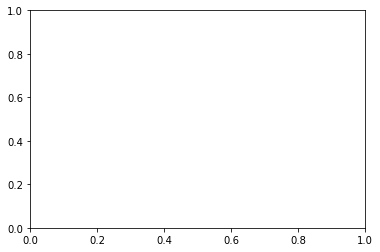

In [67]:
avg_losses_plot = [(-1 *average_loss), (-1 *avg_furnitureloss), (-1 *avg_officeloss), (-1 *avg_techloss)]
range(-10000, 10000)
bins = 10000

plt.hist(avg_losses_plot, bins, range, color = 'green', histtype = 'bar', rwidth =0.8)

plt.xlabel('average losses')
plt.ylabel('category?')
plt.show()